In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load data
data_test=pd.read_csv("https://raw.githubusercontent.com/VinitaSilaparasetty/hand-gesture-recognition/main/sign_mnist_test.csv")
data_train=pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")

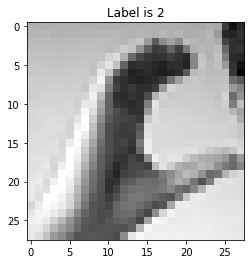

In [4]:
def show_img(img,df):
  label = data_test['label'][img]
  pixels =data_test.iloc[img,1:]
  pixels = np.array(pixels,dtype="uint8")
  pixels = pixels.reshape((28,28))

  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixels,cmap='gray')
  plt.show()

data_test.head()
show_img(20,data_test)

#extract label
y_train = data_train['label']
y_test = data_test["label"]
del data_train["label"]
del data_test["label"]

#label Binarizer
label_binarizer = LabelBinarizer()

y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = data_train.values
x_test = data_test.values

#Normalization
x_train=x_train/255
x_test=x_test/255

x_train=x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [5]:
data_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)


In [6]:
model = Sequential()
model.add(Conv2D(75,(3,3),strides=1,padding="same",activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding="same"))
model.add(Conv2D(50,(3,3),strides=1,padding="same",activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding="same"))
model.add(Conv2D(25,(3,3),strides=1,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding="same"))
model.add(Flatten())
model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=24,activation="softmax"))

In [7]:
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=['accuracy'])

In [8]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [9]:
model.fit(data_generator.flow(x_train,y_train,batch_size=128),epochs=20,validation_data=(x_test,y_test),callbacks=[learning_rate_reduction])

Epoch 1/20
38/38 [==============================] - 6s 64ms/step - loss: 3.1462 - accuracy: 0.1474 - val_loss: 3.1899 - val_accuracy: 0.0602
Epoch 2/20
38/38 [==============================] - 2s 49ms/step - loss: 3.2409 - accuracy: 0.0475 - val_loss: 3.2015 - val_accuracy: 0.0602
Epoch 3/20
38/38 [==============================] - 2s 51ms/step - loss: 3.2070 - accuracy: 0.0345 - val_loss: 3.2146 - val_accuracy: 0.0602

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
38/38 [==============================] - 2s 49ms/step - loss: 3.1818 - accuracy: 0.0420 - val_loss: 3.2319 - val_accuracy: 0.0602
Epoch 5/20
38/38 [==============================] - 2s 52ms/step - loss: 3.1768 - accuracy: 0.0404 - val_loss: 3.2695 - val_accuracy: 0.0602

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/20
38/38 [==============================] - 2s 49ms/step - loss: 3.1774 - accuracy: 0.0372 - val_loss: 3.3231 - val_accuracy:

In [10]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 1s 3ms/step - loss: 4.4623 - accuracy: 0.0402


[4.462268829345703, 0.04015616327524185]

In [12]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
  if(predictions[i]>=9 or predictions[i]>=25):
    predictions[i] += 1

predictions[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([8, 8, 8, 8, 8])

In [ ]:
#save model 
#model.save("hand-gesture.h5")